## Learning with Massive Data
### Assignment 1 - Parallel graph's triangle counter
#### Giovanni Costa - 880892

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob

### Data import

In [21]:
files=glob.glob("results/*.csv")
print(files)

['results/as-skitter_results.csv', 'results/com-amazon-ungraph_results.csv', 'results/custom-dense_results.csv']


In [22]:
df_sparse=pd.read_csv(files[0], header=0)
df_little=pd.read_csv(files[1], header=0)
df_dense=pd.read_csv(files[2], header=0)

In [23]:
df_sparse.head(3)

,n_nodes,n_edges,density,num_threads,rank_time,triangle_time
0,1696415,11095298,0.000008,1,67.706210,17.537175
1,1696415,11095298,0.000008,2,55.580149,14.481046
2,1696415,11095298,0.000008,3,50.166838,13.574053


In [24]:
df_little.head(3)

,n_nodes,n_edges,density,num_threads,rank_time,triangle_time
0,334863,925872,0.000017,1,10.481732,2.519606
1,334863,925872,0.000017,2,5.719630,1.419285
2,334863,925872,0.000017,3,6.184967,1.846284


In [25]:
df_dense.head(3)

,n_nodes,n_edges,density,num_threads,rank_time,triangle_time
0,4039,8097333,0.99296,1,16.096202,171.284792
1,4039,8097333,0.99296,2,16.400424,126.153729
2,4039,8097333,0.99296,3,18.715800,94.853013


### Empirical evaluation

In [26]:
def compute_speedup(df: pd.DataFrame):
    df['total_time']=df['rank_time']+df['triangle_time']
    seq_value=df.query("num_threads==1")['total_time']
    df['tot_speedup']=float(seq_value)/df['total_time']

    seq_value=np.mean(df.query("num_threads==1")['triangle_time'])
    df["tr_speedup"]=float(seq_value)/df['triangle_time']

    seq_value=np.mean(df.query("num_threads==1")['rank_time'])
    df["rank_speedup"]=float(seq_value)/df['rank_time']
    

def plot_alg(df: pd.DataFrame):
    plt.figure(figsize=(4, 3))
    #graph=sns.lineplot(data=tmp_df, x="num_threads", y="speedup", markers=True)
    plt.title('Parallel algorithm performance')
    plt.ylabel('Speedup')
    plt.xlabel('Number of threads')

    max_thread=df["num_threads"].max()
    max_y=max(max_thread*df["tot_speedup"].max(), max_thread*df["tr_speedup"].max(), max_thread*df["rank_speedup"].max())
    plt.xlim(0, max_thread)
    plt.ylim(0, max_y)

    thread_plot_col=pd.Series([0]+df["num_threads"].tolist())
    tot_speedup_plot_col=thread_plot_col.multiply([0]+df["tot_speedup"].tolist())
    tr_speedup_plot_col=thread_plot_col.multiply([0]+df["tr_speedup"].tolist())
    rank_speedup_plot_col=thread_plot_col.multiply([0]+df["rank_speedup"].tolist())
    plt.xticks(thread_plot_col)
    #plt.yticks(range(0, int(max_y)))

    plt.plot(thread_plot_col, thread_plot_col, color='#F52900', label="Linear speedup")
    plt.fill_between(thread_plot_col,
                    [1],
                    alpha=0.3,color="black",label="No improvement zone")
    plt.fill_between(thread_plot_col,
                    thread_plot_col,
                    alpha=0.1,color="red",label="Sublinear zone")
    plt.fill_between(thread_plot_col,
                    thread_plot_col,
                    max_y, alpha=0.1, color="green", label="Superlinear zone")

    plt.plot(thread_plot_col, rank_speedup_plot_col,
                '-x',label="RankByDeg speedup",color="#264653")
    plt.plot(thread_plot_col, tr_speedup_plot_col,
                '-x',label="Tr. counting speedup", color="#2a9d8f")
    plt.plot(thread_plot_col, tot_speedup_plot_col,
                '-x',label="Total speedup", color="#f4a261")

    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 8})
    plt.show()

#### Little dataframe

In [27]:
df_little=df_little.groupby("num_threads").mean().reset_index()
compute_speedup(df_little)

In [28]:
df_little.drop(columns=["n_nodes","n_edges","density"])

,num_threads,rank_time,triangle_time,total_time,tot_speedup,tr_speedup,rank_speedup
0,1,9.227604,2.423015,11.650619,1.000000,1.000000,1.000000
1,2,6.852917,1.844220,8.697137,1.339592,1.313843,1.346522
2,3,6.972565,1.946208,8.918774,1.306303,1.244993,1.323416
3,4,6.907120,2.124418,9.031538,1.289993,1.140555,1.335955
4,5,8.016895,2.005414,10.022308,1.162469,1.208237,1.151020
5,6,9.055049,2.163699,11.218748,1.038495,1.119849,1.019056
6,7,8.518088,2.946025,11.464113,1.016269,0.822469,1.083295
7,8,13.930543,2.871989,16.802532,0.693385,0.843671,0.662401


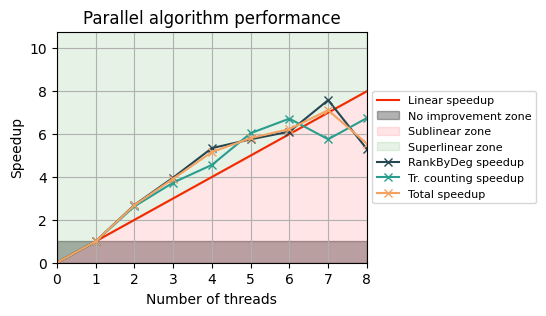

In [29]:
plot_alg(df_little)

In [30]:
print("MAX speedup score:")
print(df_little.iloc[np.argmax(df_little['tot_speedup'])], '\n')
print("MIN speedup score:")
print(df_little.iloc[np.argmin(df_little['tot_speedup'])], '\n')

MAX speedup score:
num_threads           2.000000
n_nodes          334863.000000
n_edges          925872.000000
density               0.000017
rank_time             6.852917
triangle_time         1.844220
total_time            8.697137
tot_speedup           1.339592
tr_speedup            1.313843
rank_speedup          1.346522
Name: 1, dtype: float64 

MIN speedup score:
num_threads           8.000000
n_nodes          334863.000000
n_edges          925872.000000
density               0.000017
rank_time            13.930543
triangle_time         2.871989
total_time           16.802532
tot_speedup           0.693385
tr_speedup            0.843671
rank_speedup          0.662401
Name: 7, dtype: float64 



#### Sparse dataframe

In [31]:
df_sparse=df_sparse.groupby("num_threads").mean().reset_index()
compute_speedup(df_sparse)

In [32]:
df_sparse.drop(columns=["n_nodes","n_edges","density"])

,num_threads,rank_time,triangle_time,total_time,tot_speedup,tr_speedup,rank_speedup
0,1,58.387303,17.514676,75.901978,1.000000,1.000000,1.000000
1,2,49.968713,13.679281,63.647994,1.192527,1.280380,1.168477
2,3,47.121781,13.339403,60.461184,1.255384,1.313003,1.239072
3,4,47.927656,20.754837,68.682493,1.105114,0.843884,1.218238
4,5,55.673748,14.319222,69.992969,1.084423,1.223158,1.048740
5,6,52.713679,13.810748,66.524427,1.140964,1.268192,1.107631
6,7,58.711751,14.612607,73.324358,1.035154,1.198600,0.994474
7,8,57.804042,16.812553,74.616595,1.017227,1.041762,1.010090


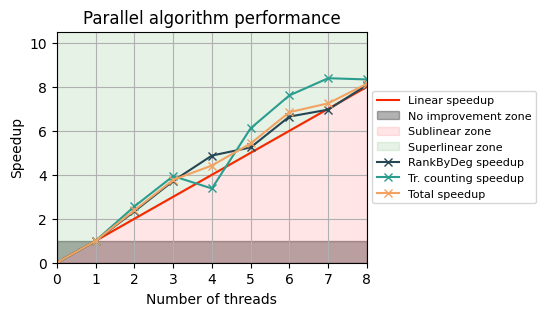

In [33]:
plot_alg(df_sparse)

In [34]:
print("MAX speedup score:")
print(df_sparse.iloc[np.argmax(df_sparse['tot_speedup'])], '\n')
print("MIN speedup score:")
print(df_sparse.iloc[np.argmin(df_sparse['tot_speedup'])], '\n')

MAX speedup score:
num_threads      3.000000e+00
n_nodes          1.696415e+06
n_edges          1.109530e+07
density          8.000000e-06
rank_time        4.712178e+01
triangle_time    1.333940e+01
total_time       6.046118e+01
tot_speedup      1.255384e+00
tr_speedup       1.313003e+00
rank_speedup     1.239072e+00
Name: 2, dtype: float64 

MIN speedup score:
num_threads      1.000000e+00
n_nodes          1.696415e+06
n_edges          1.109530e+07
density          8.000000e-06
rank_time        5.838730e+01
triangle_time    1.751468e+01
total_time       7.590198e+01
tot_speedup      1.000000e+00
tr_speedup       1.000000e+00
rank_speedup     1.000000e+00
Name: 0, dtype: float64 



#### Dense dataframe

In [35]:
df_dense=df_dense.groupby("num_threads").mean().reset_index()
compute_speedup(df_dense)

In [36]:
df_dense.drop(columns=["n_nodes","n_edges","density"])

,num_threads,rank_time,triangle_time,total_time,tot_speedup,tr_speedup,rank_speedup
0,1,15.541256,162.454873,177.996128,1.000000,1.000000,1.000000
1,2,14.933201,103.585765,118.518966,1.501837,1.568313,1.040718
2,3,17.680873,85.693414,103.374287,1.721861,1.895768,0.878987
3,4,19.896574,79.999135,99.895709,1.781820,2.030708,0.781102
4,5,21.998883,65.382101,87.380984,2.037012,2.484699,0.706457
5,6,22.829548,61.054755,83.884304,2.121924,2.660806,0.680752
6,7,23.124302,50.119635,73.243936,2.430182,3.241342,0.672075
7,8,24.533151,44.142853,68.676005,2.591824,3.680208,0.633480


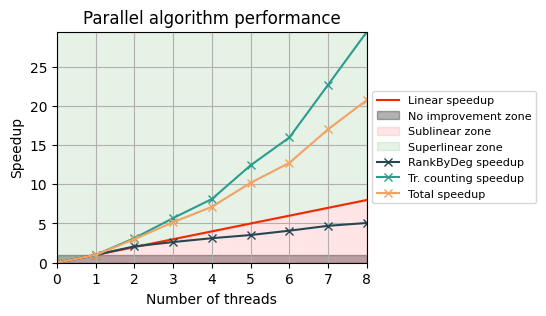

In [37]:
plot_alg(df_dense)

In [38]:
print("MAX speedup score:")
print(df_dense.iloc[np.argmax(df_dense['tot_speedup'])], '\n')
print("MIN speedup score:")
print(df_dense.iloc[np.argmin(df_dense['tot_speedup'])], '\n')

MAX speedup score:
num_threads      8.000000e+00
n_nodes          4.039000e+03
n_edges          8.097333e+06
density          9.929600e-01
rank_time        2.453315e+01
triangle_time    4.414285e+01
total_time       6.867600e+01
tot_speedup      2.591824e+00
tr_speedup       3.680208e+00
rank_speedup     6.334798e-01
Name: 7, dtype: float64 

MIN speedup score:
num_threads      1.000000e+00
n_nodes          4.039000e+03
n_edges          8.097333e+06
density          9.929600e-01
rank_time        1.554126e+01
triangle_time    1.624549e+02
total_time       1.779961e+02
tot_speedup      1.000000e+00
tr_speedup       1.000000e+00
rank_speedup     1.000000e+00
Name: 0, dtype: float64 

